In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏùò Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Í∞êÏûê/Í∞êÏûê(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding='cp949', parse_dates=["week_start"])
df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month
df['week'] = df['week_start'].dt.isocalendar().week

# Í≥ÑÏ†à Ïª¨Îüº ÏÉùÏÑ±
def get_season(month):
    if month in [3, 4, 5]:
        return 'Î¥Ñ'
    elif month in [6, 7, 8]:
        return 'Ïó¨Î¶Ñ'
    elif month in [9, 10, 11]:
        return 'Í∞ÄÏùÑ'
    else:
        return 'Í≤®Ïö∏'

df['season'] = df['month'].apply(get_season)

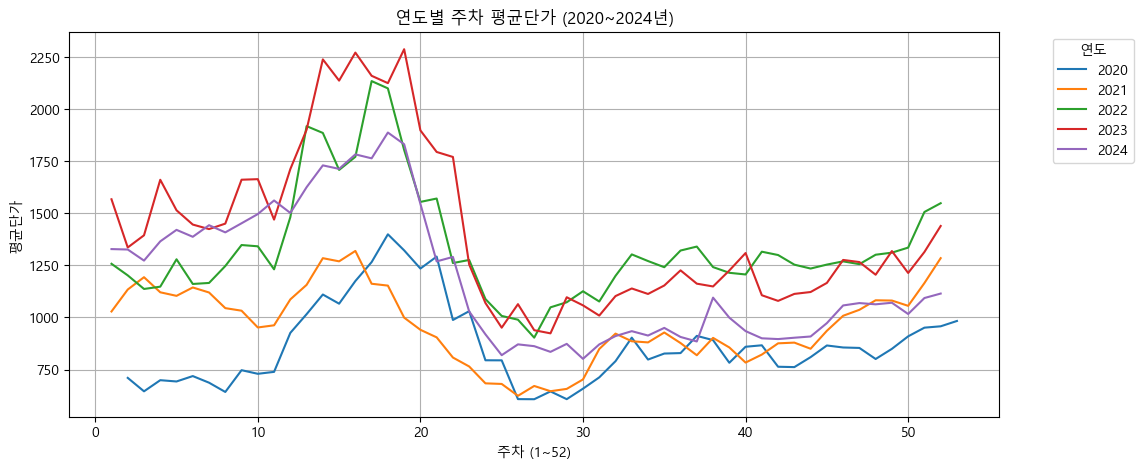

In [44]:
df_filtered = df[df['year'].between(2020, 2024)]

weekly_avg = df_filtered.groupby(['week', 'year'])['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'].mean().unstack()

weekly_avg.plot(figsize=(12, 5), title = "Ïó∞ÎèÑÎ≥Ñ Ï£ºÏ∞® ÌèâÍ∑†Îã®Í∞Ä (2020~2024ÎÖÑ)")
plt.xlabel("Ï£ºÏ∞® (1~52)")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä")
plt.legend(title='Ïó∞ÎèÑ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

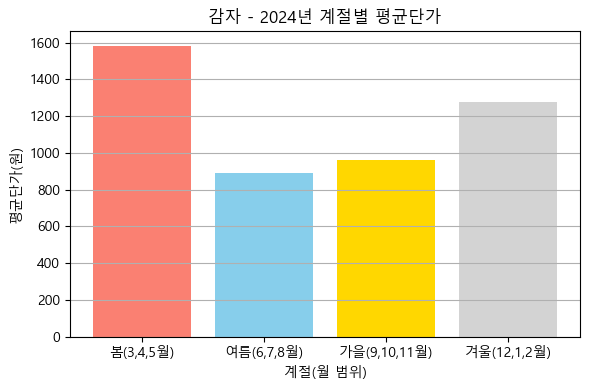

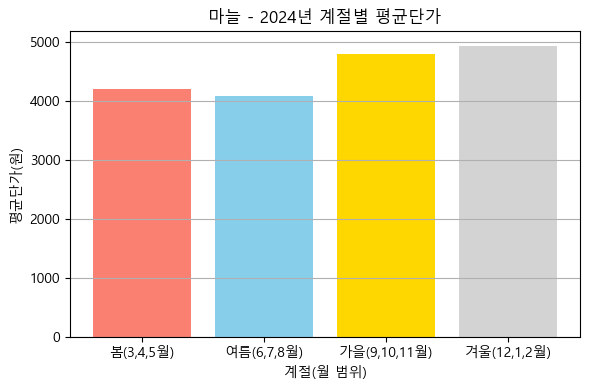

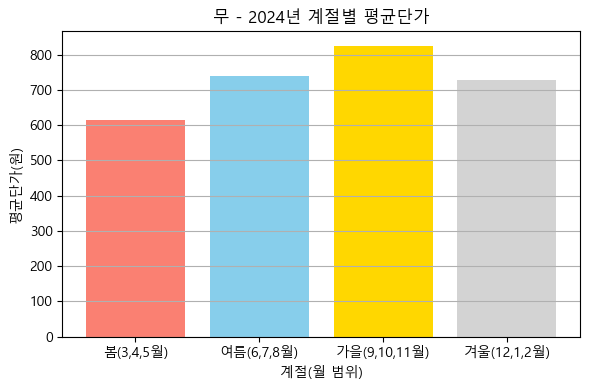

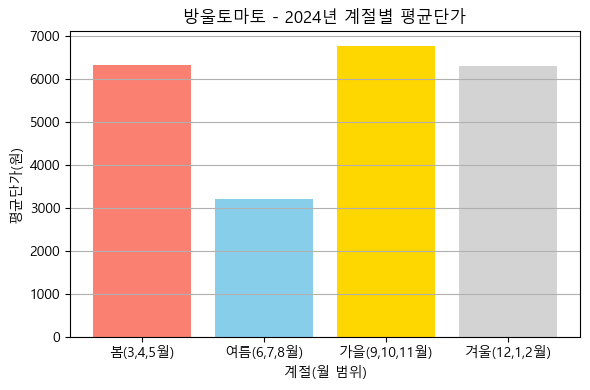

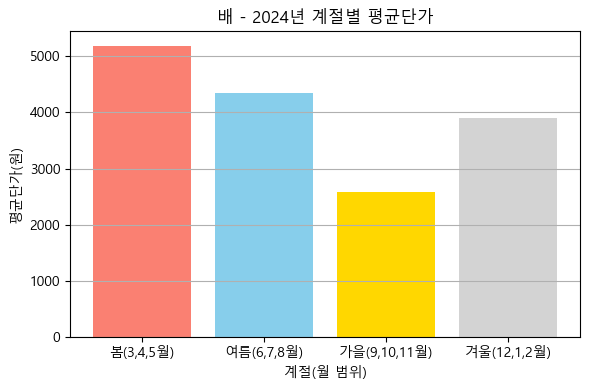

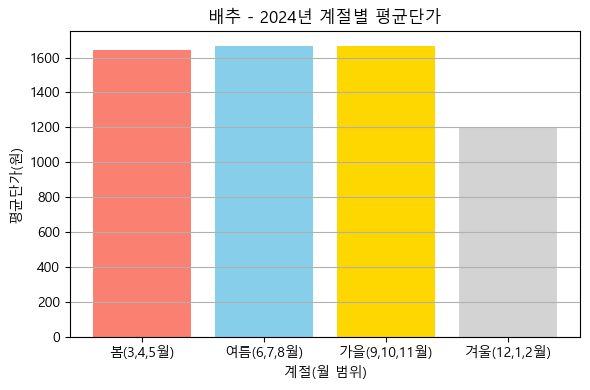

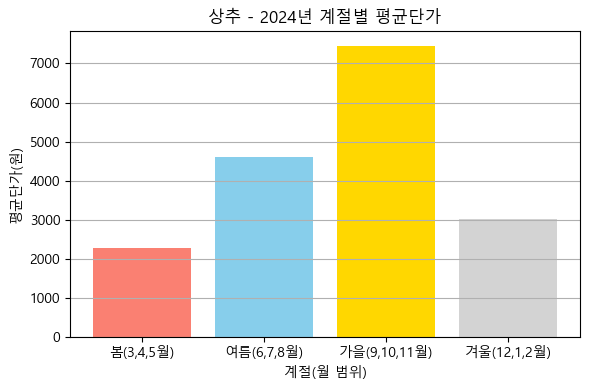

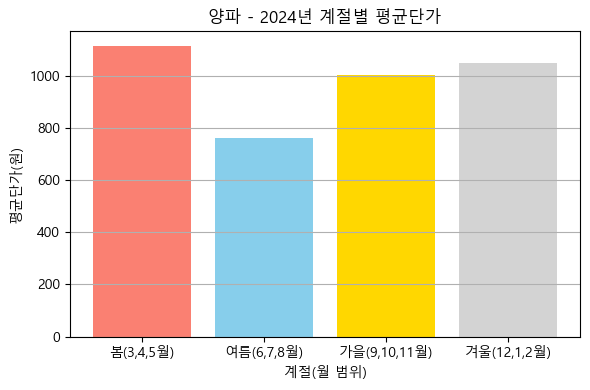

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Patch
import seaborn as sns
import re

plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏùò Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

file_list = glob.glob('EDA/*.csv')

def get_season(month):
    if month in [3, 4, 5]:
        return 'Î¥Ñ'
    elif month in [6, 7, 8]:
        return 'Ïó¨Î¶Ñ'
    elif month in [9, 10, 11]:
        return 'Í∞ÄÏùÑ'
    else:
        return 'Í≤®Ïö∏'
    
season_legend = {
    'Î¥Ñ': '3,4,5Ïõî',
    'Ïó¨Î¶Ñ': '6,7,8Ïõî',
    'Í∞ÄÏùÑ': '9,10,11Ïõî',
    'Í≤®Ïö∏': '12,1,2Ïõî'
}

# Í≥ÑÏ†àÎ≥Ñ ÏÉâÏÉÅ
season_colors = {
    'Î¥Ñ': 'salmon',
    'Ïó¨Î¶Ñ': 'skyblue',
    'Í∞ÄÏùÑ': 'gold',
    'Í≤®Ïö∏': 'lightgray'
}

for file_path in file_list:
    try:
        df = pd.read_csv(file_path, encoding = 'cp949', parse_dates=['week_start'])

        # Ïó∞ÎèÑ Î∞è Ï£ºÏ∞® Ï∂îÏ∂ú
        df['year'] = df['week_start'].dt.year
        df['month'] = df['week_start'].dt.month
        df['season'] = df['month'].apply(get_season)

        # 2024ÎÖÑÎßå ÌïÑÌÑ∞ÎßÅ
        df_2024 = df[df['year'] == 2024]

        # Í≥ÑÏ†àÎ≥Ñ ÌèâÍ∑†Îã®Í∞Ä Í≥ÑÏÇ∞
        seasonal_avg = df_2024.groupby('season')['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'].mean().reindex(['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≤®Ïö∏'])

        # ÌíàÎ™©Î™Ö Ï∂îÏ∂ú (ÌååÏùºÎ™ÖÏóêÏÑú)
        filename = os.path.basename(file_path)
        item_name = re.split(r'\(', filename)[0]

        # ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(6, 4))

        seasons = seasonal_avg.index.tolist()
        values = seasonal_avg.values.tolist()
        colors = [season_colors[s] for s in seasons]

        # ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
        plt.bar(range(len(seasons)), values, color=colors)

        # XÏ∂ï Î†àÏù¥Î∏îÏóê Ïõî Ìè¨Ìï®
        xtick_labels = [f"{s}({season_legend[s]})" for s in seasons]
        plt.xticks(ticks=range(len(seasons)), labels=xtick_labels, rotation=0)

        plt.title(f"{item_name.strip()} - 2024ÎÖÑ Í≥ÑÏ†àÎ≥Ñ ÌèâÍ∑†Îã®Í∞Ä")
        plt.xlabel("Í≥ÑÏ†à(Ïõî Î≤îÏúÑ)")
        plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)")
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {file_path}")
        print(f"ÏóêÎü¨ ÎÇ¥Ïö©: {e}")

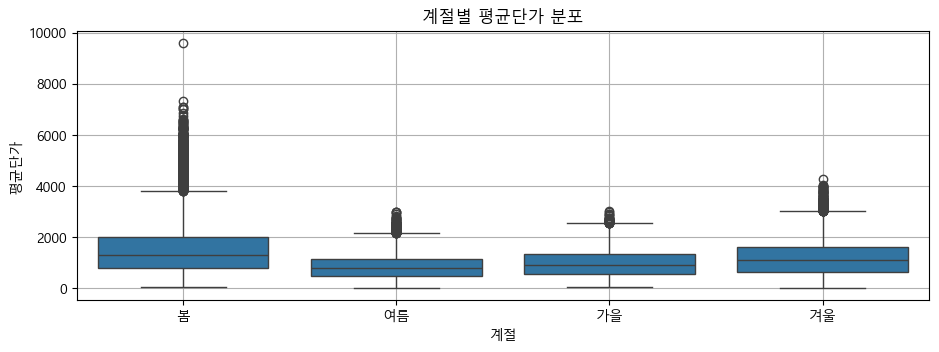

In [49]:
plt.figure(figsize=(11, 3.5))
sns.boxplot(x='season', y='ÌèâÍ∑†Îã®Í∞Ä(Ïõê)', data=df, order=['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≤®Ïö∏'])
plt.title("Í≥ÑÏ†àÎ≥Ñ ÌèâÍ∑†Îã®Í∞Ä Î∂ÑÌè¨")
plt.xlabel("Í≥ÑÏ†à")
plt.ylabel("ÌèâÍ∑†Îã®Í∞Ä")
plt.grid(True)
plt.show()

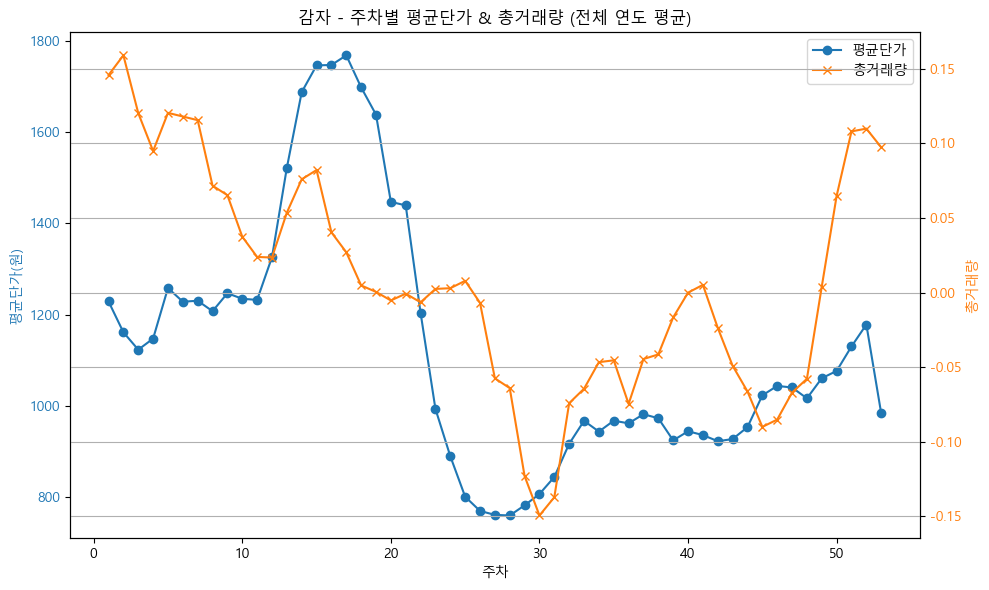

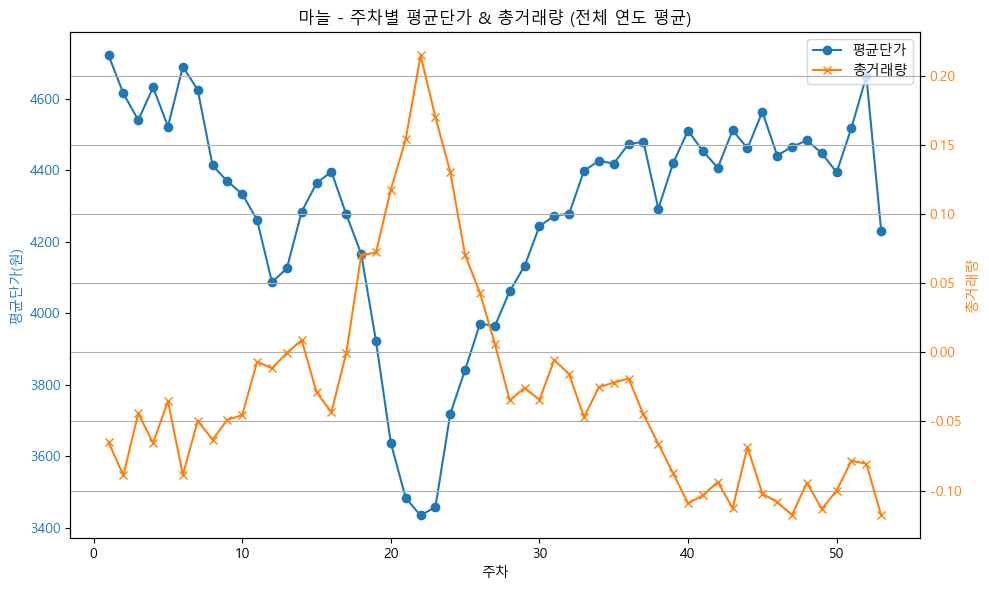

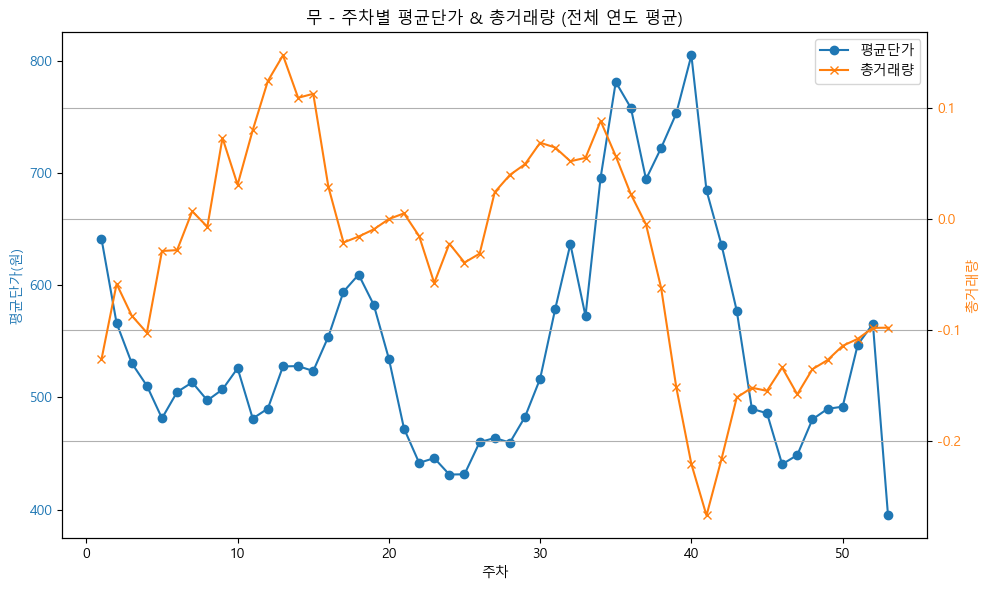

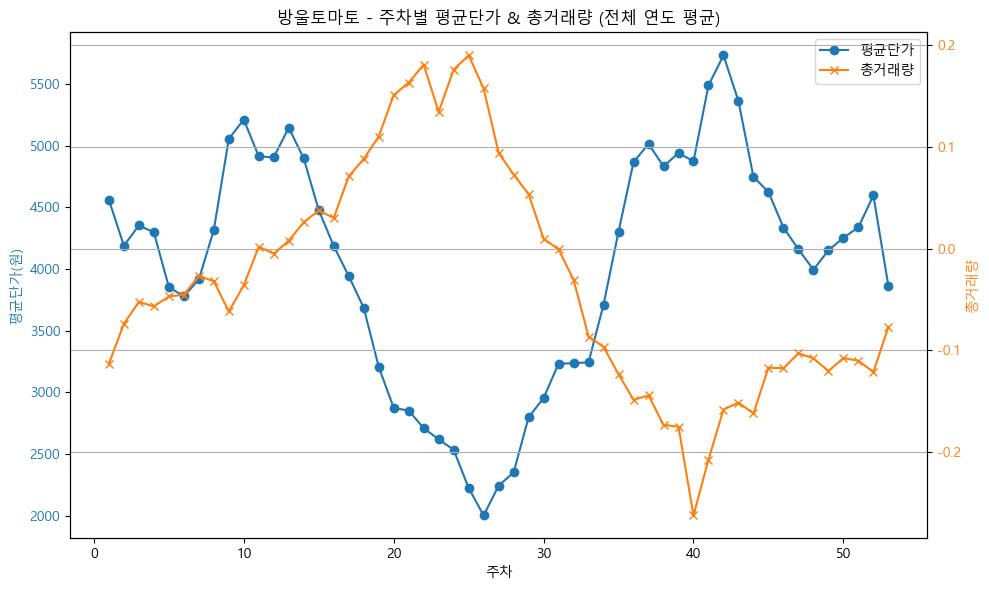

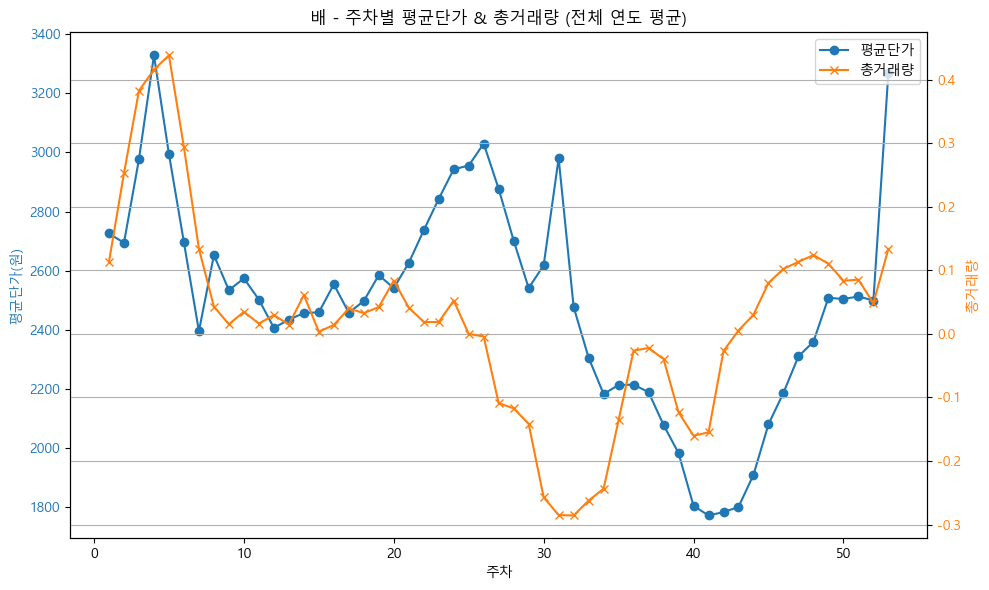

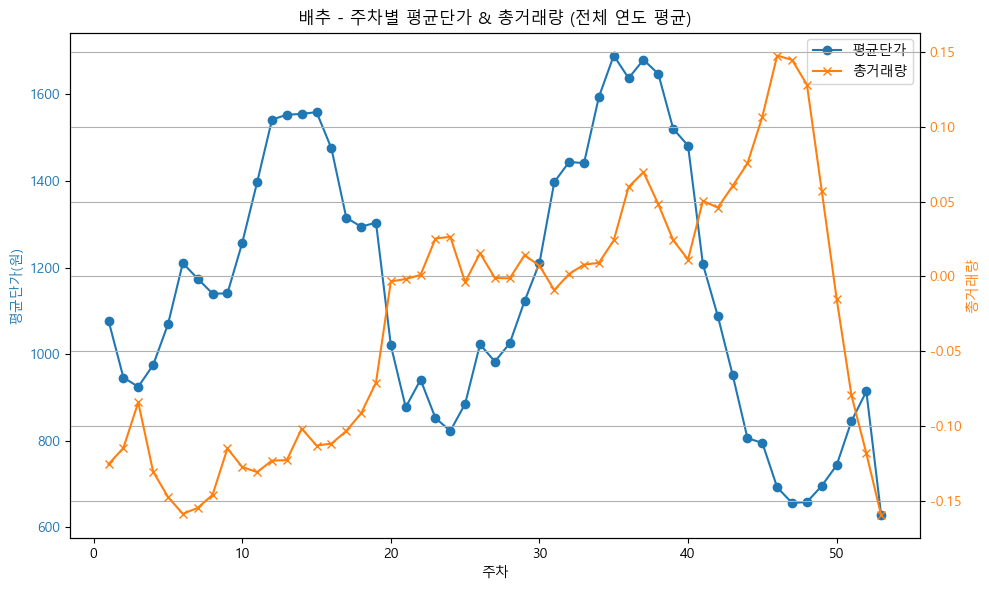

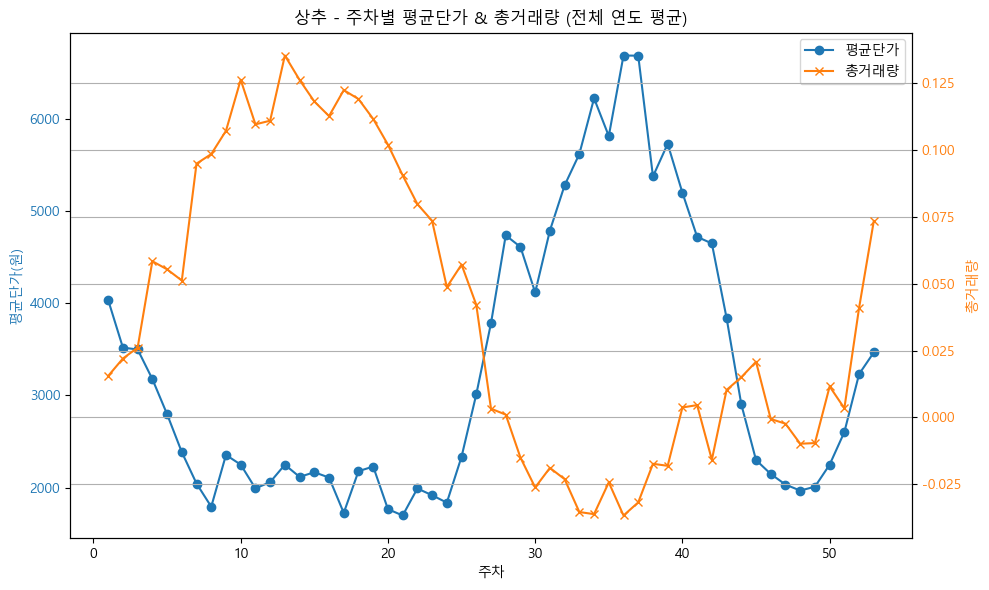

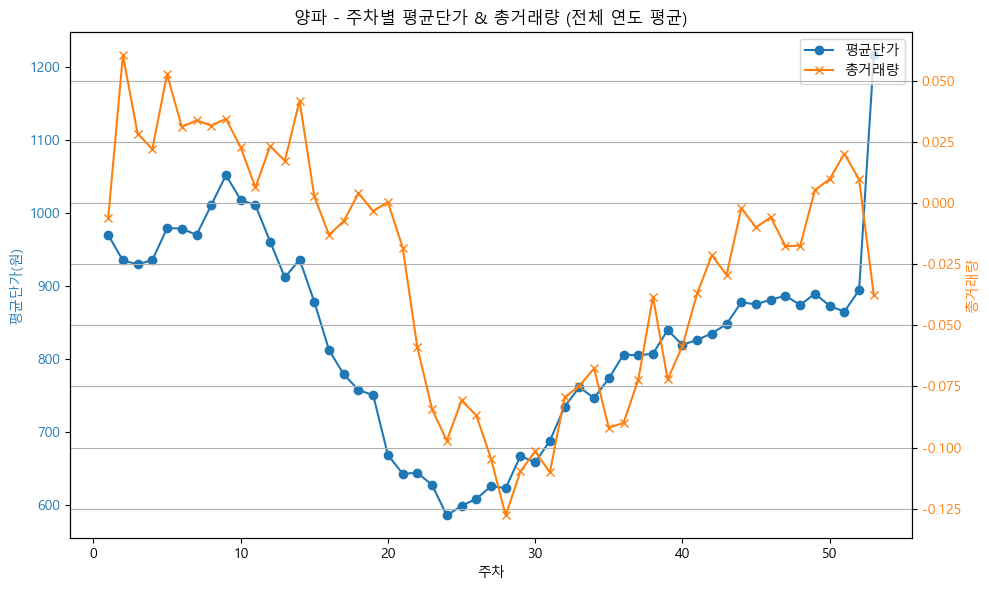

In [15]:
file_list = glob.glob('EDA/*.csv')

for file_path in file_list:
    try:
        df = pd.read_csv(file_path, encoding='cp949', parse_dates=['week_start'])

        df['week'] = df['week_start'].dt.isocalendar().week

        weekly_avg = df.groupby('week')[['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)', 'Ï¥ùÍ±∞ÎûòÎüâ(kg)']].mean().reset_index()

        filename = os.path.basename(file_path)
        item_name = re.split(r'\(', filename)[0].strip()

        # Ïù¥Ï§ëÏ∂ï Í∑∏ÎûòÌîÑ
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Ï≤´ Î≤àÏß∏ YÏ∂ï (ÌèâÍ∑†Îã®Í∞Ä)
        line1, = ax1.plot(weekly_avg['week'], weekly_avg['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'], color='tab:blue', marker='o', label='ÌèâÍ∑†Îã®Í∞Ä')
        ax1.set_xlabel("Ï£ºÏ∞®")
        ax1.set_ylabel("ÌèâÍ∑†Îã®Í∞Ä(Ïõê)", color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # Îëê Î≤àÏß∏ YÏ∂ï (Í±∞ÎûòÎüâ)
        ax2 = ax1.twinx()
        line2, = ax2.plot(weekly_avg['week'], weekly_avg['Ï¥ùÍ±∞ÎûòÎüâ(kg)'], color='tab:orange', marker='x', label='Ï¥ùÍ±∞ÎûòÎüâ')
        ax2.set_ylabel("Ï¥ùÍ±∞ÎûòÎüâ", color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='tab:orange')
        
        # Î≤îÎ°Ä ÌÜµÌï©
        lines = [line1, line2]
        labels = [line.get_label() for line in lines]
        ax1.legend(lines, labels, loc='upper right')

        # Ï†úÎ™© Î∞è Î†àÏù¥ÏïÑÏõÉ
        plt.title(f"{item_name} - Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑†Îã®Í∞Ä & Ï¥ùÍ±∞ÎûòÎüâ (Ï†ÑÏ≤¥ Ïó∞ÎèÑ ÌèâÍ∑†)")
        fig.tight_layout()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {file_path}")
        print(f"ÏóêÎü¨ ÎÇ¥Ïö©: {e}")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("Í∞êÏûê/Í∞êÏûê(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding='cp949', parse_dates=["week_start"])

plt.rcParams['font.family'] = 'Malgun Gothic'  # WindowsÏùò Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month
df['week'] = df['week_start'].dt.isocalendar().week
df['dayofweek'] = df['week_start'].dt.dayofweek

In [3]:
# ÌÉÄÍ≤ü: Îã§Ïùå Ï£ºÏùò ÌèâÍ∑†Îã®Í∞Ä ÏòàÏ∏°
target_col = 'ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'
X = df.drop(columns=[target_col, 'week_start'])  # week_startÎäî ÏãúÍ∞Ñ Ïù∏Îç±Ïä§Ïù¥ÎØÄÎ°ú Ï†úÏô∏
y = df[target_col]

‚úÖ Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å (2024ÎÖÑÍπåÏßÄ)


In [4]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [8]:
for i, (train_idx, test_idx) in enumerate(tscv.split(df), 1):
    print(f"[Fold {i}]")
    print("Train Í∏∞Í∞Ñ:", df.iloc[train_idx[0]]['week_start'], "‚Üí", df.iloc[train_idx[-1]]['week_start'])
    print("Test  Í∏∞Í∞Ñ:", df.iloc[test_idx[0]]['week_start'], "‚Üí", df.iloc[test_idx[-1]]['week_start'])

[Fold 1]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2019-03-25 00:00:00
Test  Í∏∞Í∞Ñ: 2019-03-25 00:00:00 ‚Üí 2020-04-27 00:00:00
[Fold 2]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2020-04-27 00:00:00
Test  Í∏∞Í∞Ñ: 2020-04-27 00:00:00 ‚Üí 2021-06-21 00:00:00
[Fold 3]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2021-06-21 00:00:00
Test  Í∏∞Í∞Ñ: 2021-06-21 00:00:00 ‚Üí 2022-09-26 00:00:00
[Fold 4]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2022-09-26 00:00:00
Test  Í∏∞Í∞Ñ: 2022-09-26 00:00:00 ‚Üí 2024-02-05 00:00:00
[Fold 5]
Train Í∏∞Í∞Ñ: 2018-01-29 00:00:00 ‚Üí 2024-02-05 00:00:00
Test  Í∏∞Í∞Ñ: 2024-02-05 00:00:00 ‚Üí 2025-05-26 00:00:00


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
tscv = TimeSeriesSplit(n_splits=5)

mae_list, rmse_list, r2_list = [], [], []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"[Fold {fold}] MAE: {mae:.2f} | RMSE: {rmse:.2f} | R¬≤: {r2:.4f}")

[Fold 1] MAE: 376.53 | RMSE: 479.51 | R¬≤: 0.1619
[Fold 2] MAE: 237.22 | RMSE: 321.98 | R¬≤: 0.6215
[Fold 3] MAE: 314.67 | RMSE: 427.18 | R¬≤: 0.5527
[Fold 4] MAE: 208.51 | RMSE: 286.41 | R¬≤: 0.8336
[Fold 5] MAE: 317.26 | RMSE: 405.08 | R¬≤: 0.6609


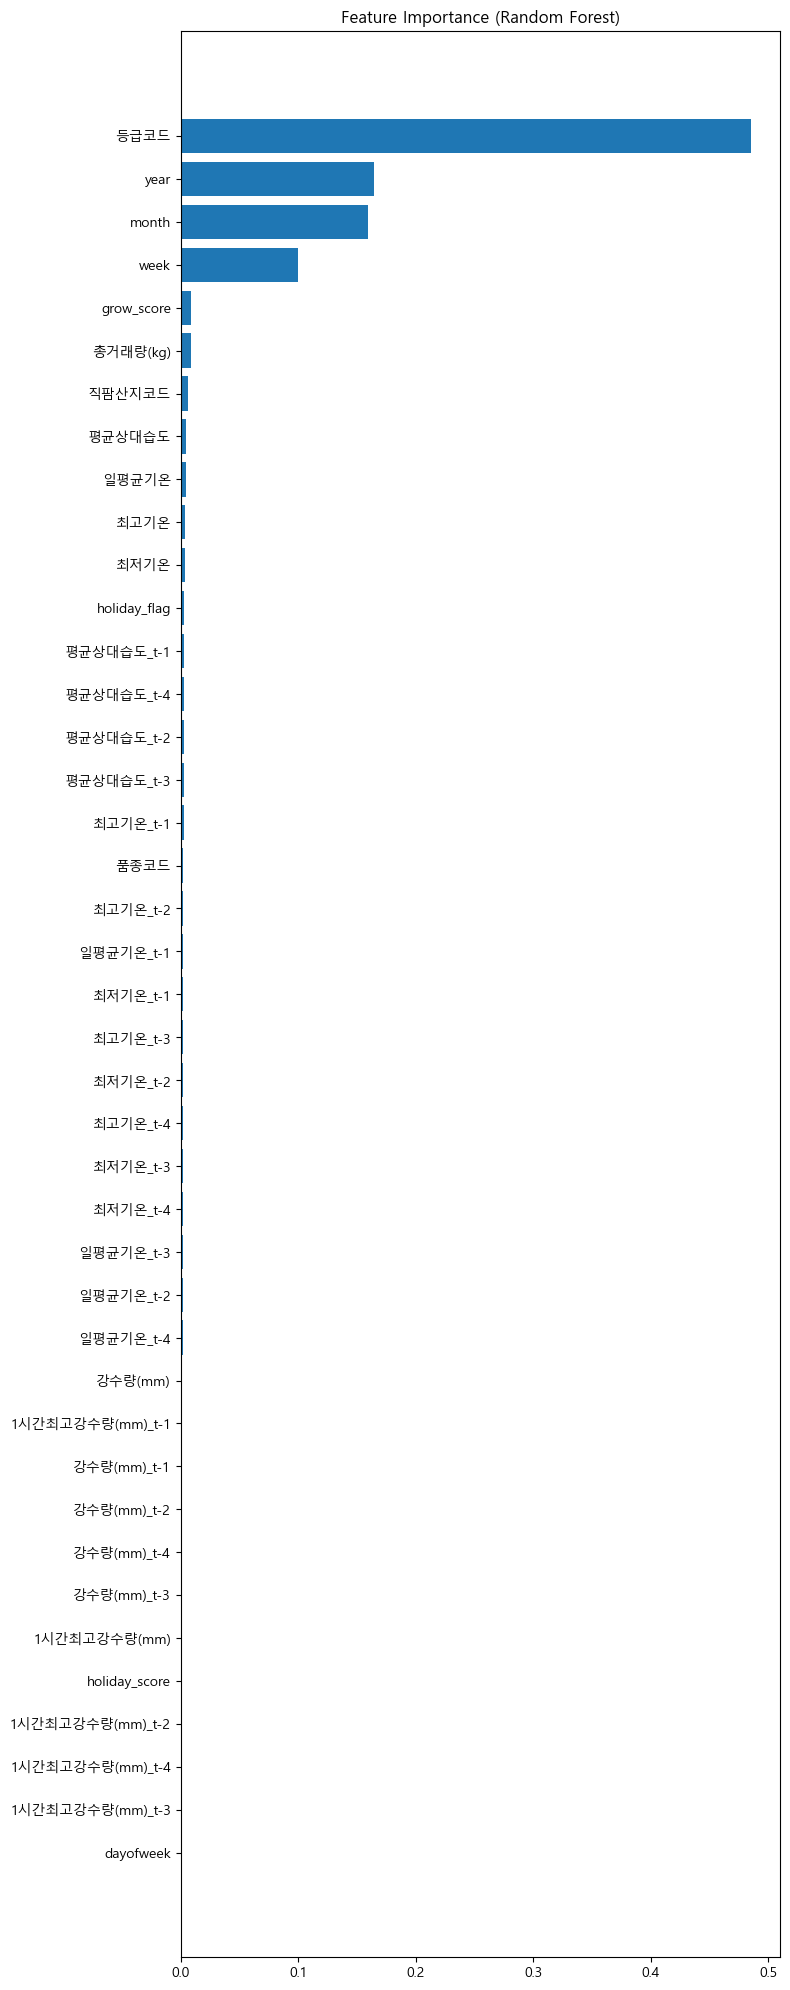

In [6]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú ÌïôÏäµ
model.fit(X, y)

# Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, len(feature_names)//2))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from xgboost import DMatrix, train
from scipy.sparse import csr_matrix

df = pd.read_csv("EDA/Î¨¥(EDAÏö©)_Ïä§ÏºÄÏùºÎßÅÎßå.csv", encoding="cp949")

# 2. ÏãúÍ≥ÑÏó¥ ÌååÏÉù ÌîºÏ≤ò ÏÉùÏÑ± Ìï®Ïàò
def add_time_series_features(df):
    df = df.copy()

    # Ï£ºÍ∏∞ÏÑ± Ïù∏ÏΩîÎî©
    df["sin_week"] = np.sin(2 * np.pi * df["week"] / 52)
    df["cos_week"] = np.cos(2 * np.pi * df["week"] / 52)

    # Ïù¥Îèô ÌèâÍ∑†
    df = df.sort_index()  # week_start Í∏∞Ï§Ä
    df["avg_price_ma_3"] = df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"].rolling(window=3, min_periods=1).mean()
    df["volume_ma_3"] = df["Ï¥ùÍ±∞ÎûòÎüâ(kg)"].rolling(window=3, min_periods=1).mean()

    # Î≥ÄÌôîÏú®
    df["avg_price_diff_1w"] = df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"].diff()
    df["avg_price_pct_change_1w"] = df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"].pct_change()
    df["volume_pct_change_1w"] = df["Ï¥ùÍ±∞ÎûòÎüâ(kg)"].pct_change()

    # ÏãúÍ∏∞ Íµ¨Î∂Ñ
    df["is_early_year"] = (df["week"] <= 20).astype(int)
    df["is_late_year"] = (df["week"] >= 40).astype(int)

    # Í≤∞Ï∏° Ï†úÍ±∞
    df = df.dropna()
    return df

# 3. Ï†ÑÏ≤òÎ¶¨
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.set_index("week_start")
df = add_time_series_features(df)

In [2]:
# 4. ÌÉÄÍ≤ü/ÏûÖÎ†• Î∂ÑÎ¶¨
y = df["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"]
X = df.drop(columns=["ÌèâÍ∑†Îã®Í∞Ä(Ïõê)"])
X = pd.get_dummies(X, columns=["ÌíàÏ¢ÖÏΩîÎìú", "ÏßÅÌåúÏÇ∞ÏßÄÏΩîÎìú"])

# 5. 2025ÎÖÑ Ï†úÏô∏ÌïòÍ≥† ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
X_train = X[X["year"] <= 2024].drop(columns=["year", "week"])
y_train = y[X["year"] <= 2024]

In [4]:
# 6. Ìù¨ÏÜå ÌñâÎ†¨ Î≥ÄÌôò Î∞è DMatrix Íµ¨ÏÑ±
X_train = X_train.astype(np.float32)
X_sparse = csr_matrix(X_train.values)
dtrain = DMatrix(X_sparse, label=y_train)

# 7. XGBoost Î™®Îç∏ ÌïôÏäµ
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "max_depth": 6,
    "eta": 0.1,
    "seed": 42
}

model = train(params, dtrain, num_boost_round=100)

ValueError: could not convert string to float: '2018-01-29'

In [5]:
# ÏòàÏ∏° Í≤∞Í≥º Ï∂îÍ∞Ä
df_train['ÏòàÏ∏°Í∞í'] = model.predict(X_train)

# Ï£ºÏ∞®Î≥Ñ ÏßëÍ≥Ñ
weekly_scores = (
    df_train.groupby(['year', 'week'])
    .apply(lambda g: pd.Series({
        'RMSE': mean_squared_error(g[target_col], g['ÏòàÏ∏°Í∞í'], squared=False),
        'R2': r2_score(g[target_col], g['ÏòàÏ∏°Í∞í']) if len(g) > 1 else None,
        'Ïã§Ï†úÌèâÍ∑†Îã®Í∞Ä': g[target_col].mean(),
        'ÏòàÏ∏°ÌèâÍ∑†Îã®Í∞Ä': g['ÏòàÏ∏°Í∞í'].mean()
    }))
).reset_index()

print("\nüìä Ï£ºÏ∞®Î≥Ñ ÏÑ±Îä• ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(weekly_scores)
# weekly_scores.to_csv("Ï£ºÏ∞®Î≥Ñ_ÏÑ±Îä•ÌèâÍ∞Ä.csv", index=False)  # Ï†ÄÏû• ÏõêÌï† Ïãú


üìä Ï£ºÏ∞®Î≥Ñ ÏÑ±Îä• ÎØ∏Î¶¨Î≥¥Í∏∞:
     year  week        RMSE        R2      Ïã§Ï†úÌèâÍ∑†Îã®Í∞Ä      ÏòàÏ∏°ÌèâÍ∑†Îã®Í∞Ä
0    2018     5  188.605049  0.130497  483.673469  567.726746
1    2018     6  228.885362  0.310084  653.503876  598.399536
2    2018     7  222.567658  0.296035  504.528662  558.385864
3    2018     8  332.779236  0.354411  584.676471  591.011719
4    2018     9  269.649998  0.371159  616.946667  596.469849
..    ...   ...         ...       ...         ...         ...
356  2024    48  392.719355  0.201473  984.356164  922.127747
357  2024    49  359.482327  0.281668  916.471349  883.748291
358  2024    50  323.382437  0.223010  801.357955  842.616638
359  2024    51  313.203562  0.207923  859.353659  867.570374
360  2024    52  273.134414  0.208599  910.484211  879.272522

[361 rows x 6 columns]


In [36]:
# 1. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Î∂àÎü¨Ïò§Í∏∞
df_all = pd.read_csv("EDA/Î¨¥_lag_ÌïôÏäµÏö©.csv", encoding='cp949')

# 3. Ï£ºÏ∞® Í∏∞Ï§Ä ÌïÑÌÑ∞ÎßÅ: 2024ÎÖÑ 22Ï£ºÏ∞® ~ 2025ÎÖÑ 22Ï£ºÏ∞®
test_mask = (((df_all['year'] == 2024) & (df_all['week'] >= 22)) |
             ((df_all['year'] == 2025) & (df_all['week'] <= 22)))
df_test = df_all[test_mask].copy()

# 4. ÏòàÏ∏° ÎåÄÏÉÅ ÏûÖÎ†• Ï§ÄÎπÑ (Ïà´ÏûêÌòïÎßå, target_col Ï†úÏô∏)
target_col = 'ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'
X_test = df_test.drop(columns=[target_col]).select_dtypes(include=['number', 'bool'])
y_test = df_test[target_col]

# ‚úÖ Í∏∞Ï°¥Ïóê ÌïôÏäµÌïú Î™®Îç∏ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏°
df_test['ÏòàÏ∏°Í∞í'] = model.predict(X_test)

# 5. ÏÑ±Îä• ÌèâÍ∞Ä
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, df_test['ÏòàÏ∏°Í∞í'], squared=False)
r2 = r2_score(y_test, df_test['ÏòàÏ∏°Í∞í'])

print(f"‚úÖ ÏòàÏ∏° Î≤îÏúÑ: 2024ÎÖÑ 6Ïõî ~ 2025ÎÖÑ 5Ïõî")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤ Score: {r2:.4f}")

# 6. Ï£ºÏ∞®Î≥Ñ RMSE/R2 ÌôïÏù∏
weekly_eval = (
    df_test.groupby(['year', 'week'])
    .apply(lambda g: pd.Series({
        'Ïã§Ï†úÌèâÍ∑†Îã®Í∞Ä': g[target_col].mean(),
        'ÏòàÏ∏°ÌèâÍ∑†Îã®Í∞Ä': g['ÏòàÏ∏°Í∞í'].mean(),
        'RMSE': mean_squared_error(g[target_col], g['ÏòàÏ∏°Í∞í'], squared=False),
        'R2': r2_score(g[target_col], g['ÏòàÏ∏°Í∞í']) if len(g) > 1 else None
    }))
).reset_index()

print(weekly_eval.head())

‚úÖ ÏòàÏ∏° Î≤îÏúÑ: 2024ÎÖÑ 6Ïõî ~ 2025ÎÖÑ 5Ïõî
RMSE: 264.00
R¬≤ Score: 0.5068
   year  week      Ïã§Ï†úÌèâÍ∑†Îã®Í∞Ä      ÏòàÏ∏°ÌèâÍ∑†Îã®Í∞Ä       RMSE        R2
0  2024    22  670.625000  639.657776  83.051408  0.878149
1  2024    23  626.443243  626.654236  66.103951  0.904256
2  2024    24  583.186047  602.028809  73.100169  0.873409
3  2024    25  594.222892  600.340576  68.784116  0.861242
4  2024    26  581.800926  599.804443  68.764827  0.868698


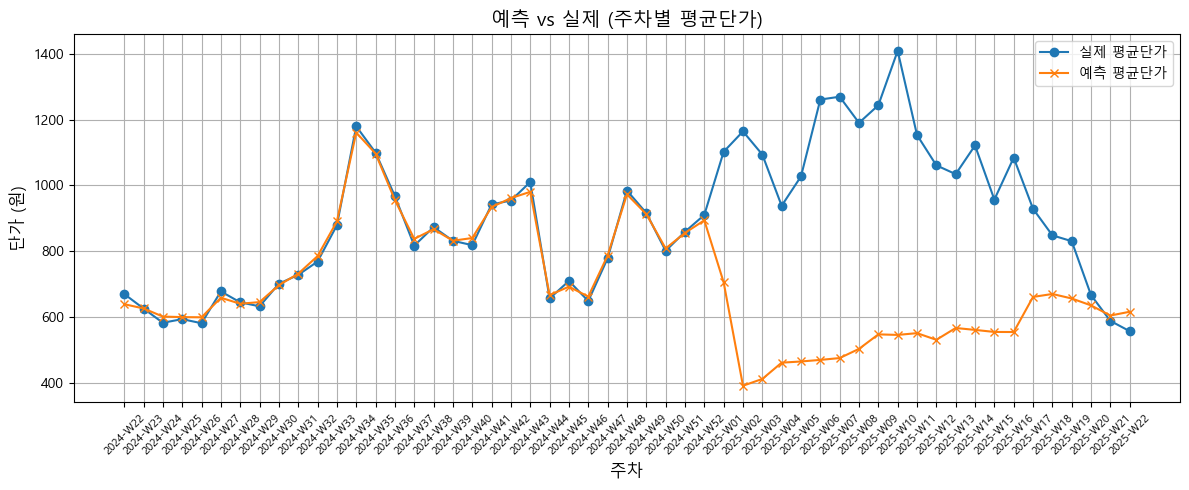

In [38]:
import matplotlib.pyplot as plt

# 1. Ï£ºÏ∞® Îã®ÏúÑÎ°ú ÌèâÍ∑† ÏßëÍ≥Ñ
df_plot = (
    df_test.groupby(['year', 'week'])[['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)', 'ÏòàÏ∏°Í∞í']]
    .mean()
    .reset_index()
)

# 2. Ï£ºÏ∞® ÏàúÏÑúÎåÄÎ°ú xÏ∂ï ÎßåÎì§Í∏∞ (Ïó∞ÎèÑ + Ï£ºÏ∞®Î•º Î¨∏ÏûêÏó¥Î°ú)
df_plot['Ï£ºÏ∞®'] = df_plot['year'].astype(str) + '-W' + df_plot['week'].astype(str).str.zfill(2)

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
plt.plot(df_plot['Ï£ºÏ∞®'], df_plot['ÌèâÍ∑†Îã®Í∞Ä(Ïõê)'], label='Ïã§Ï†ú ÌèâÍ∑†Îã®Í∞Ä', marker='o')
plt.plot(df_plot['Ï£ºÏ∞®'], df_plot['ÏòàÏ∏°Í∞í'], label='ÏòàÏ∏° ÌèâÍ∑†Îã®Í∞Ä', marker='x')
plt.xticks(rotation=45, fontsize=8)
plt.title('ÏòàÏ∏° vs Ïã§Ï†ú (Ï£ºÏ∞®Î≥Ñ ÌèâÍ∑†Îã®Í∞Ä)', fontsize=14)
plt.xlabel('Ï£ºÏ∞®', fontsize=12)
plt.ylabel('Îã®Í∞Ä (Ïõê)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

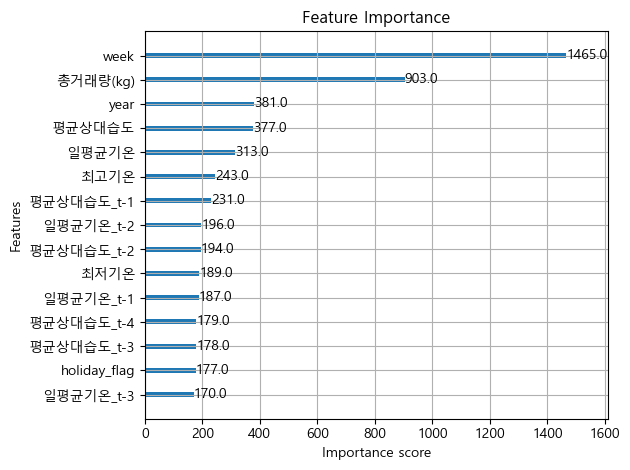

In [39]:
xgb.plot_importance(model, max_num_features=15)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [40]:
import shap
import numpy as np

# TreeExplainer ÏÉùÏÑ± (XGBoost Î™®Îç∏ Í∏∞Î∞ò)
explainer = shap.Explainer(model, X_test)

# SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer(X_test)

 98%|===================| 11897/12079 [01:00<00:00]        

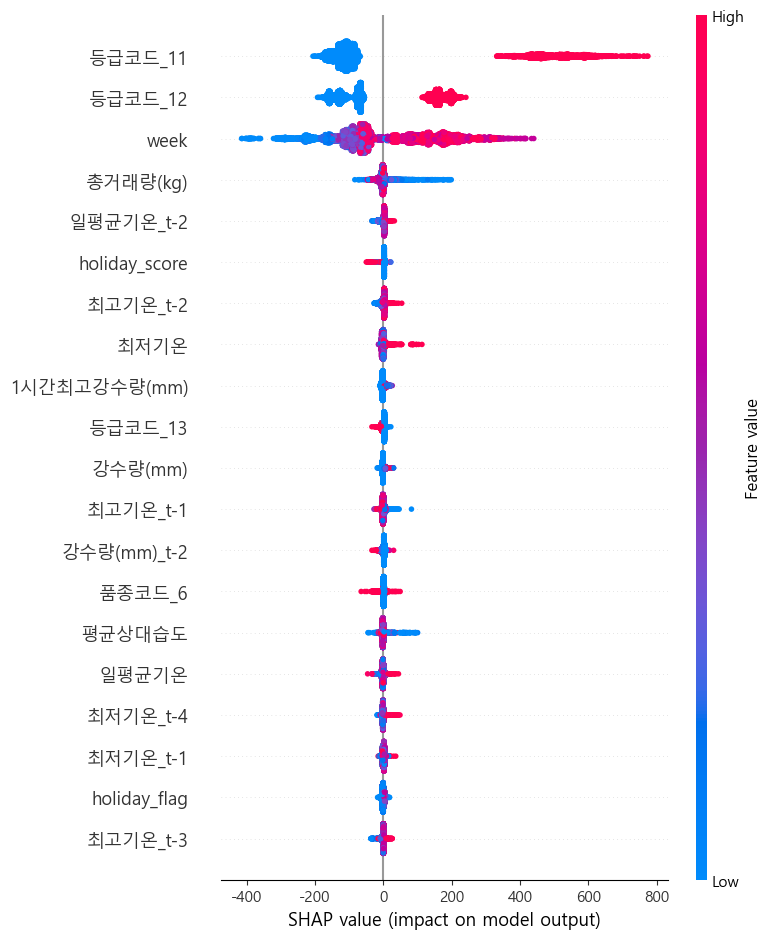

In [41]:
shap.summary_plot(shap_values, X_test)

In [43]:
import shap
shap.initjs()

shap.plots.force(shap_values[0])

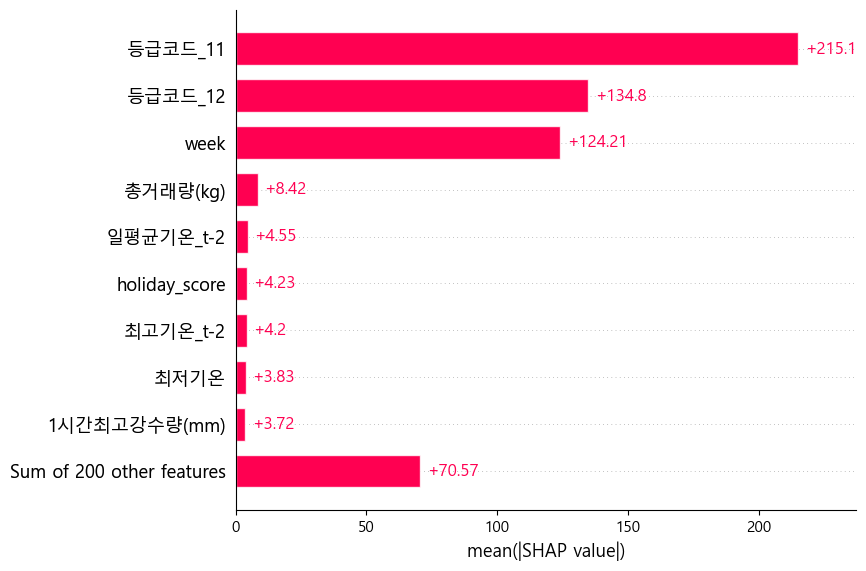

In [44]:
shap.plots.bar(shap_values)